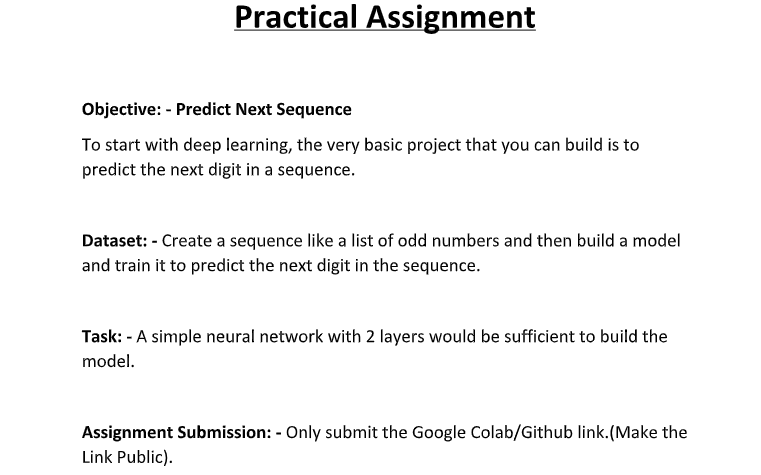

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM


In [11]:
sequence_length = 500
sequence = [2*i + 1 for i in range(sequence_length)]
len(sequence)

500

In [12]:
sequence

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

### Preparing the dataset

In [13]:
def create_sequences(sequence, window_size):
    inputs = []
    targets = []

    for i in range(len(sequence) - window_size):
        inputs.append(sequence[i:i + window_size])
        targets.append(sequence[i + window_size])
    return np.array(inputs), np.array(targets)

window_size = 5
X,y = create_sequences(sequence, window_size)

In [16]:
X

array([[  1,   3,   5,   7,   9],
       [  3,   5,   7,   9,  11],
       [  5,   7,   9,  11,  13],
       ...,
       [985, 987, 989, 991, 993],
       [987, 989, 991, 993, 995],
       [989, 991, 993, 995, 997]])

In [17]:
y

array([ 11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,  33,  35,
        37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59,  61,
        63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,
        89,  91,  93,  95,  97,  99, 101, 103, 105, 107, 109, 111, 113,
       115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139,
       141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165,
       167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191,
       193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217,
       219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243,
       245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269,
       271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295,
       297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321,
       323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347,
       349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 37

### Spliting the Data

In [18]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [19]:
print(f"x_train shape : {X_train.shape}")
print(f"x_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (396, 5)
x_test shape : (99, 5)
y_train shape : (396,)
y_test shape : (99,)


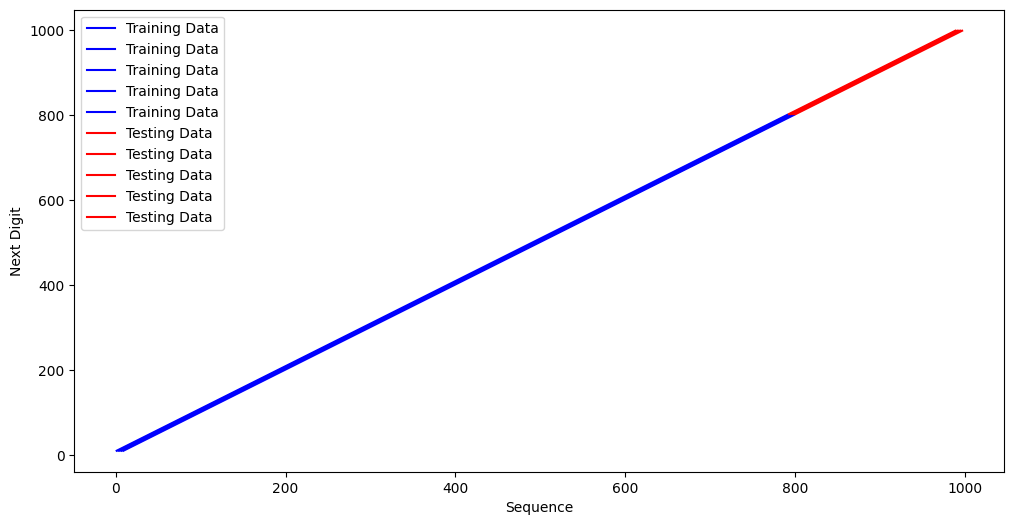

In [20]:
import matplotlib.pyplot as plt

# Plot the training data
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Training Data', color='blue')

# Plot the testing data
plt.plot(X_test, y_test, label='Testing Data', color='red')

# Add labels and legend
plt.xlabel('Sequence')
plt.ylabel('Next Digit')
plt.legend(loc='best')

# Show the plot
plt.show()


### Creating a Time Serise Model

In [23]:
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


### Let's Train the model

In [24]:
model.fit(X_train, y_train, epochs = 100, batch_size=16)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 37533.0547
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1806.3342
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 122.3368
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 9.0555
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6407
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 2.9748
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 2.8519
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 2.2574
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1.9375
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 1.8196
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 1.9098
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3656
Epoch 13/100
25/25 [========

In [25]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")


4/4 [==============================] - 1s 4ms/step - loss: 3.0227e-05
Test Loss: 0.0000


In [34]:
input_sequence = np.array([sequence[-window_size:]])
input_sequence


array([[991, 993, 995, 997, 999]])

In [30]:
predicted_number = model.predict(input_sequence)
print(f"Predicted Next Number: {predicted_number[0][0]}")

1/1 [==============================] - 0s 38ms/step
Predicted Next Number: 1001.0007934570312


In [36]:
model.predict([[995, 997, 999,1001,1003]])
1/1 [==============================] - 0s 77ms/step
array([[1005.0009]], dtype=float32)

1/1 [==============================] - 0s 77ms/step


array([[1005.0009]], dtype=float32)

In [37]:
model.predict([[1001,1003,1005,1007,1009]])

1/1 [==============================] - 0s 73ms/step


array([[1011.00134]], dtype=float32)

1/1 [==============================] - 0s 62ms/step


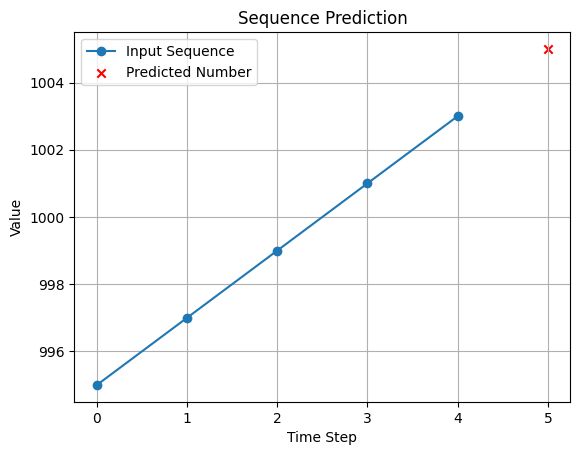

In [39]:
import matplotlib.pyplot as plt

# Input sequence
input_sequence = [995, 997, 999, 1001, 1003]

# Predict the next number
predicted_number = model.predict([input_sequence])[0][0]

# Plot the input sequence and the predicted number
plt.plot(range(len(input_sequence)), input_sequence, marker='o', label='Input Sequence')
plt.scatter(len(input_sequence), predicted_number, color='red', marker='x', label='Predicted Number')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Sequence Prediction')
plt.legend()
plt.grid(True)
plt.show()
